## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [1]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)
    
    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])
    
    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (1000, 50, 1)
Output shape: (1000,)


In [3]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

C:\Users\SRIJAN SASMAL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2282 - val_loss: 0.0550
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - val_loss: 0.0017
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 6.0044e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6693e-04 - val_loss: 3.4141e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1089e-04 - val_loss: 2.5704e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2917e-04 - val_loss: 1.7935e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6257e-04 - val_loss: 1.4084e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0526e-04 - val_loss: 8.3497e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7921e-05 - val_loss: 5.8945e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8301e-05 - val_loss: 2.4273e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9901e-05 - val_loss: 1.2295e-

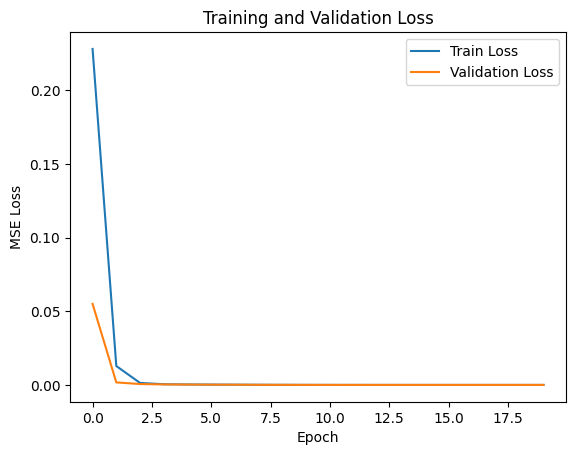

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


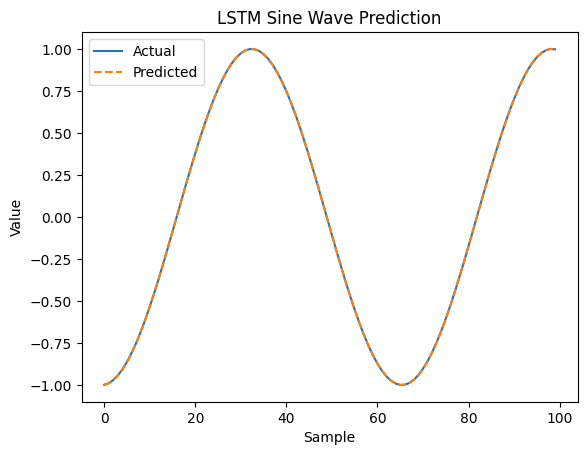

In [6]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

- #### Observations:

LSTM Concept: LSTMs, a type of RNN, mitigate vanishing/exploding gradients using a memory cell and gating mechanisms (forget, input, output gates) to manage long-term dependencies in sequence data.

Data Generation: A synthetic sine wave dataset was created for a sequence regression task. The input data, representing the past 50 steps, was reshaped to (1000, 50, 1) (samples, time steps, features), which is the required 3D format for the Keras LSTM layer.

Model Architecture: A simple Sequential model was built, consisting of a single LSTM layer (50 units, tanh activation) and a Dense output layer (1 unit) for predicting the next value. Total trainable parameters: 10,451.

Training Configuration: The model was trained using the Adam optimizer (lr=0.001) and the Mean Squared Error (MSE) loss function, which is standard for regression problems.

Generalization: The training and validation loss curves tracked closely throughout the 20 epochs, confirming the model generalized well to the unseen validation data and did not overfit.

Prediction Accuracy: The model's predictions for the sine wave sequence almost perfectly matched the actual values, demonstrating its ability to accurately learn and forecast the periodic pattern.